In [1]:
#attempt to improve the NN
#add the local and the global view construct coz transit false positive mismatch seems to be a major problem
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [9]:
temp1=np.loadtxt('training_data/Xtrain_av_raw.csv',delimiter=',')
temp2=np.loadtxt('training_data/Xtrain_av_raw_v2.csv',delimiter=',')
temp3=np.loadtxt('training_data/Xtrain_av_raw_v3.csv',delimiter=',')
temp4=np.loadtxt('training_data/Xtrain_av_raw_v4.csv',delimiter=',')
print(temp1.shape)
print(temp2.shape)
print(temp3.shape)
print(temp4.shape)


(4700, 2000)
(6710, 200)
(6710, 100)
(6636, 200)


In [2]:
acc_func=[]
val_acc_func=[]
test_accuracy=[]

In [4]:
#main code:
#Q1. ARE MORE LAYERS BETTER? We use 2 classifier Training sample to test this
def are_more_layers_better(Xtrain,Ytrain,Xtest,Ytest,img_size,no_l,epoch):
    #add hidden layers
    conv_ip = keras.layers.Input(shape=(img_size,),name='Input')
    x=keras.layers.Reshape((img_size, 1), input_shape=(img_size,),name='reshape_1')(conv_ip)
    x=keras.layers.BatchNormalization()(x)

    for i in range(0,no_l):
        x=keras.layers.Conv1D(16,kernel_size=3,strides=1,activation='tanh',name='conv16_3_'+str(i))(x)
    x=keras.layers.MaxPool1D(3,strides=2 ,data_format='channels_last',name='maxpool_1')(x)
    for i in range(0,no_l):
        x=keras.layers.Conv1D(32,kernel_size=3,strides=1,activation='tanh',name='conv32_3_'+str(i))(x)
    x=keras.layers.MaxPool1D(3,strides=2,data_format='channels_last',name='maxpool_2')(x)
    x=keras.layers.Flatten(name='flat_1')(x)
    x3=keras.layers.Dense(128,name='dense_layer_1',activation='relu')(x)
    x3=keras.layers.Dense(128,name='dense_layer_3',activation='relu')(x3)
    conv_op=keras.layers.Dense(2,name='dense_layer_4',activation='softmax')(x3)

    convNN = keras.Model(inputs=conv_ip, outputs=conv_op,name='Convolutional_NN')
    convNN.summary()
    convNN.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00005), loss='categorical_crossentropy',metrics=['accuracy'])
    es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    history=convNN.fit(np.array(Xtrain),np.array(Ytrain), batch_size=64, epochs=epoch , verbose=1 , validation_split=0.2,callbacks=[es_callback])

    fig,ax=plt.subplots(1,1,figsize=(5,5))
    ax.plot(history.history['accuracy'])
    ax.plot(history.history['val_accuracy'])
    ax.set_title('model Accuracy')
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('epoch')
    ax.legend(['train', 'test'], loc='upper left')
    #plt.savefig('loop_acc_100_3d0'+str(no_l)+'_'+str(img_size)+'.png')

    test_loss, test_acc = convNN.evaluate(np.array(Xtest), np.array(Ytest))
    print('Test accuracy:', test_acc)
    test_accuracy.append(test_acc)
    acc_func.append(history.history['accuracy'])
    val_acc_func.append(history.history['val_accuracy'])
    #plt.show()



In [5]:
X_train=np.loadtxt('training_data/Xtrain_av_raw200_2_2d5_v2.csv',delimiter=',')
Y_train=np.loadtxt('training_data/Ytrain_av_raw200_2_2d5_v2.csv',delimiter=',')
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_train, Y_train, test_size=0.1)

print("shapes:",Xtrain.shape,Ytrain.shape,Xtest.shape,Ytest.shape)



shapes: (3927, 200) (3927, 2) (437, 200) (437, 2)


Model: "Convolutional_NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 200)]             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 200, 1)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 200, 1)            4         
_________________________________________________________________
conv16_3_0 (Conv1D)          (None, 198, 16)           64        
_________________________________________________________________
maxpool_1 (MaxPooling1D)     (None, 98, 16)            0         
_________________________________________________________________
conv32_3_0 (Conv1D)          (None, 96, 32)            1568      
_________________________________________________________________
maxpool_2 (MaxPooling1D)     (None, 47, 32)       

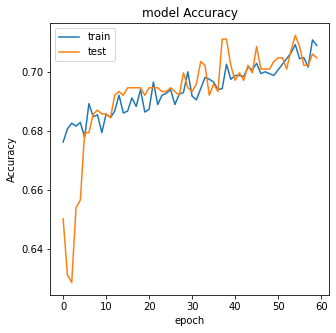

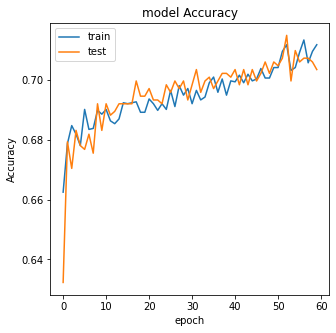

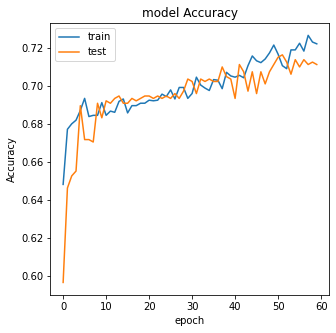

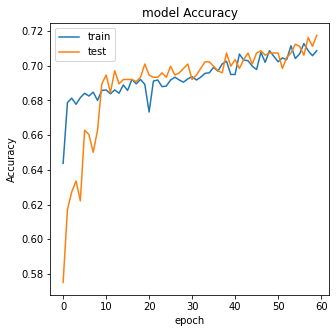

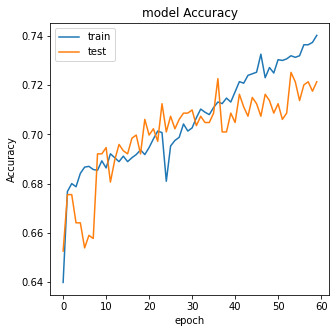

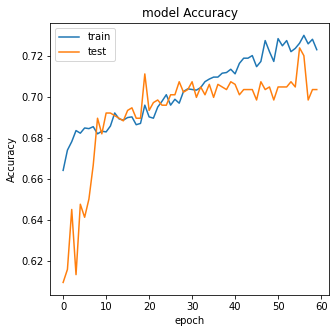

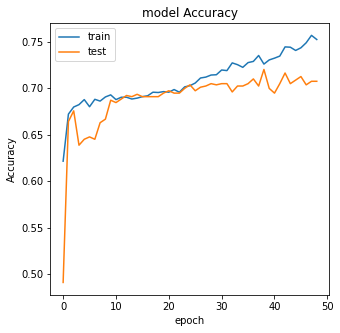

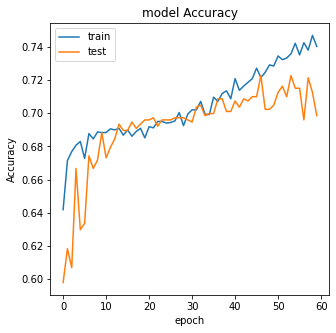

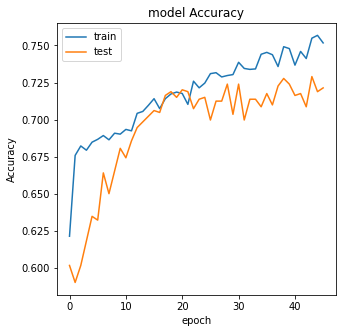

In [6]:

are_more_layers_better(Xtrain,Ytrain,Xtest,Ytest,200,1,60)
are_more_layers_better(Xtrain,Ytrain,Xtest,Ytest,200,2,60)
are_more_layers_better(Xtrain,Ytrain,Xtest,Ytest,200,3,60)
are_more_layers_better(Xtrain,Ytrain,Xtest,Ytest,200,4,60)
are_more_layers_better(Xtrain,Ytrain,Xtest,Ytest,200,5,60)
are_more_layers_better(Xtrain,Ytrain,Xtest,Ytest,200,6,60)
are_more_layers_better(Xtrain,Ytrain,Xtest,Ytest,200,7,60)
are_more_layers_better(Xtrain,Ytrain,Xtest,Ytest,200,8,60)
are_more_layers_better(Xtrain,Ytrain,Xtest,Ytest,200,9,60)


[[0.7048345804214478, 0.7048345804214478, 0.7010177969932556, 0.707379162311554, 0.7124682068824768, 0.7086514234542847, 0.7022900581359863, 0.7022900581359863, 0.7061068415641785, 0.7048345804214478], [0.7048345804214478, 0.707379162311554, 0.7150127291679382, 0.6997455358505249, 0.7099236845970154, 0.7061068415641785, 0.707379162311554, 0.707379162311554, 0.7061068415641785, 0.703562319278717], [0.7150127291679382, 0.716284990310669, 0.7124682068824768, 0.7061068415641785, 0.7137404680252075, 0.7099236845970154, 0.7137404680252075, 0.7111959457397461, 0.7124682068824768, 0.7111959457397461], [0.707379162311554, 0.6984732747077942, 0.7048345804214478, 0.707379162311554, 0.7124682068824768, 0.7111959457397461, 0.7061068415641785, 0.716284990310669, 0.7111959457397461, 0.7175572514533997], [0.7124682068824768, 0.7061068415641785, 0.7086514234542847, 0.7251908183097839, 0.7213740348815918, 0.7137404680252075, 0.7201017737388611, 0.7213740348815918, 0.7175572514533997, 0.7213740348815918]

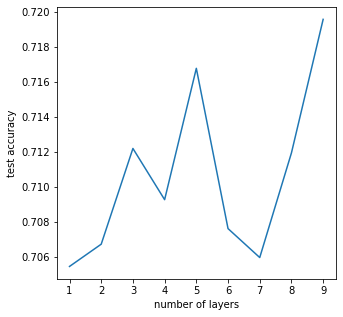

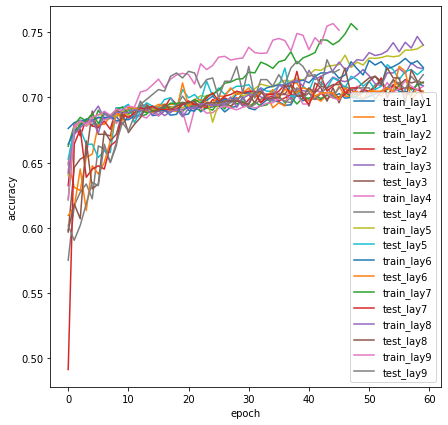

In [12]:
#print(test_accuracy)
#print(acc_func)
#print(val_acc_func)
new_mean=[el[-10:] for el in val_acc_func]
print(new_mean)
new_mean=[np.mean(el[-10:]) for el in val_acc_func]
fig2,ax2=plt.subplots(1,1,figsize=(5,5))
ax2.plot(np.arange(1,len(test_accuracy)+1,1),new_mean)
ax2.set_xlabel('number of layers')
ax2.set_ylabel('test accuracy')
plt.savefig('test_acc_progression_2d5_200.png')

fig3,ax3=plt.subplots(1,1,figsize=(7,7))
for i in range(0,len(val_acc_func)):
    ax3.plot(acc_func[i],label="train_lay"+str(i+1))
    ax3.plot(val_acc_func[i],label="test_lay"+str(i+1))
ax3.legend()
ax3.set_xlabel('epoch') 
ax3.set_ylabel('accuracy')

#np.savetxt('comprehensive_cnn_acc.csv',acc_func,delimiter=',')
plt.savefig('lc_cumulative_2d5_200.png')
plt.show()